In [ ]:
import tensorflow as tf


#Loading -"Mnist data set"
## containing Target sample =60,000,testing Sample =10,000
### tensorflow already contain MNIST data  set which  can be loaded  using Keras


In [ ]:
mnist = tf.keras.datasets.mnist


#After Loading  the MNIST Data , divide  into train and test  dataset


In [ ]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()   ## unpacking the dataset   into train and test dataset

11501568/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train.shape

(60000, 28, 28)

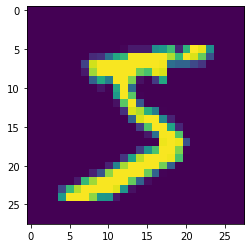

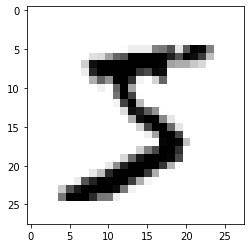

In [ ]:
import matplotlib.pyplot as plt 

plt.imshow(x_train[0])
plt.show()

plt.imshow(x_train[0], cmap= plt.cm.binary)


#cheking the values  of each pixel
## before Normalization


In [ ]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

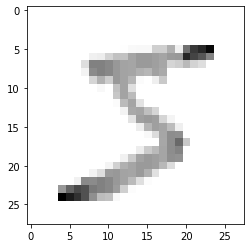

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [ ]:
print(x_train[0]) ##you can see all values are now normalized

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0]) ##just ot check that we have labels inside our network

In [ ]:
import numpy as np
IMG_SIZE = 28
x_trainr = np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1)
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE)
print("Trainig samples dimension",x_trainr.shape)
print("Testing samples dimenstion",x_testr.shape)


Trainig samples dimension (60000, 28, 28, 1)
Testing samples dimenstion (10000, 28, 28)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D

In [ ]:
## creating a neural network now
model = Sequential()

model.add(Conv2D(64, (3,3), input_shape = x_trainr.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation("relu"))

model.add(Dense(32))
model.add(Activation("relu"))

model.add(Dense(10))
model.add(Activation("softmax"))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 activation_1 (Activation)   (None, 26, 26, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 activation_2 (Activation)   (None, 11, 11, 64)        0         
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                  

In [ ]:
print("Total Traning Samples = ",len(x_trainr))

Total Traning Samples =  60000


In [ ]:
model.compile(loss = "sparse_categorical_crossentropy",optimizer = "adam",metrics = ['accuracy'])

In [ ]:
model.fit(x_trainr,y_train,epochs=5, validation_split = 0.3)

Epoch 1/5
1313/1313 [==============================] - 72s 54ms/step - loss: 0.3198 - accuracy: 0.9007 - val_loss: 0.1319 - val_accuracy: 0.9594
Epoch 2/5
1313/1313 [==============================] - 70s 54ms/step - loss: 0.0973 - accuracy: 0.9707 - val_loss: 0.0863 - val_accuracy: 0.9742
Epoch 3/5
1313/1313 [==============================] - 70s 54ms/step - loss: 0.0712 - accuracy: 0.9784 - val_loss: 0.0886 - val_accuracy: 0.9738
Epoch 4/5
1313/1313 [==============================] - 72s 55ms/step - loss: 0.0551 - accuracy: 0.9825 - val_loss: 0.0646 - val_accuracy: 0.9802
Epoch 5/5
1313/1313 [==============================] - 74s 56ms/step - loss: 0.0424 - accuracy: 0.9870 - val_loss: 0.0627 - val_accuracy: 0.9800


In [ ]:
test_loss, test_acc = model.evaluate(x_testr, y_test)
print("Test loss on 10000 test samples")
print("Validation Accuracy on 10000 test samples")

313/313 [==============================] - 4s 12ms/step - loss: 0.0698 - accuracy: 0.9788
Test loss on 10000 test samples
Validation Accuracy on 10000 test samples


In [ ]:
predicions = model.predict(x_testr)

In [ ]:
print(predicions)

[[1.1011567e-09 1.8795747e-07 1.2386326e-06 ... 9.9999702e-01
  5.8819783e-08 4.3324111e-08]
 [4.5428512e-04 2.2387656e-04 9.9925107e-01 ... 5.0799146e-05
  4.2694819e-06 1.9343922e-06]
 [1.9242439e-06 9.9996078e-01 7.7140271e-07 ... 1.8812594e-06
  2.3681595e-07 6.9593665e-07]
 ...
 [5.1205502e-09 6.0117895e-07 1.7042362e-08 ... 8.0271894e-07
  1.3289857e-06 3.6217040e-07]
 [4.1922608e-09 7.9621053e-08 6.1904060e-10 ... 6.5506849e-12
  4.1667140e-06 3.4043990e-07]
 [1.4014104e-06 3.3124298e-08 4.5638063e-07 ... 2.2230730e-10
  1.1772311e-05 3.2824249e-07]]


In [ ]:
print(np.argmax(predicions[0]))

7


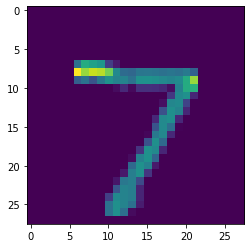

In [ ]:
plt.imshow(x_test[0])

In [ ]:
print(np.argmax(predicions[128]))

8


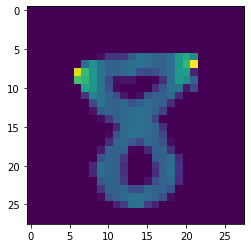

In [ ]:
plt.imshow(x_test[128])

In [ ]:
pip install opencv-python

In [ ]:
import cv2

In [ ]:
img = cv2.imread("eight.png")

In [ ]:
print(img)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


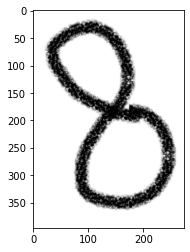

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(396, 274, 3)

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(396, 274)

In [ ]:
resized = cv2.resize(gray,(28,28),interpolation = cv2.INTER_AREA)

In [ ]:
resized.shape

(28, 28)

In [ ]:
newimg = tf.keras.utils.normalize(resized, axis = 1)

In [ ]:
newimg = np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
newimg.shape

(1, 28, 28, 1)

In [ ]:
predicions = model.predict(newimg)

In [ ]:
print(np.argmax(predicions))

0
